In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [6]:
# Paths
BASE_DIR = Path().resolve().parents[1]
file_PATH_global = BASE_DIR / "data" / "final" / "whole_data_merged.csv"
file_PATH_arctic = BASE_DIR / "data" / "final" / "final_arctic.csv" 

# Load data
df_global = pd.read_csv(file_PATH_global)
df_arctic = pd.read_csv(file_PATH_arctic)

In [7]:
# --- GLOBAL TEMPERATURE ---
df_global['year'] = pd.to_datetime(df_global['year'], format='%Y').dt.year
global_temp = df_global.groupby('year')['global_temp_c'].mean().reset_index()
global_temp = global_temp[global_temp['year'] >= 1978]

# --- ARCTIC TEMPERATURE ---
if 'month' in df_arctic.columns:
    # Kelvin → Celsius
    df_arctic['t2m'] = df_arctic['t2m'] - 273.15
    arctic_temp = df_arctic.groupby('year')['t2m'].mean().reset_index()
else:
    month_cols = [col for col in df_arctic.columns if col.isdigit()]
    df_arctic[month_cols] = df_arctic[month_cols] - 273.15
    df_arctic['t2m_c'] = df_arctic[month_cols].mean(axis=1)
    arctic_temp = df_arctic.groupby('year')['t2m_c'].mean().reset_index()

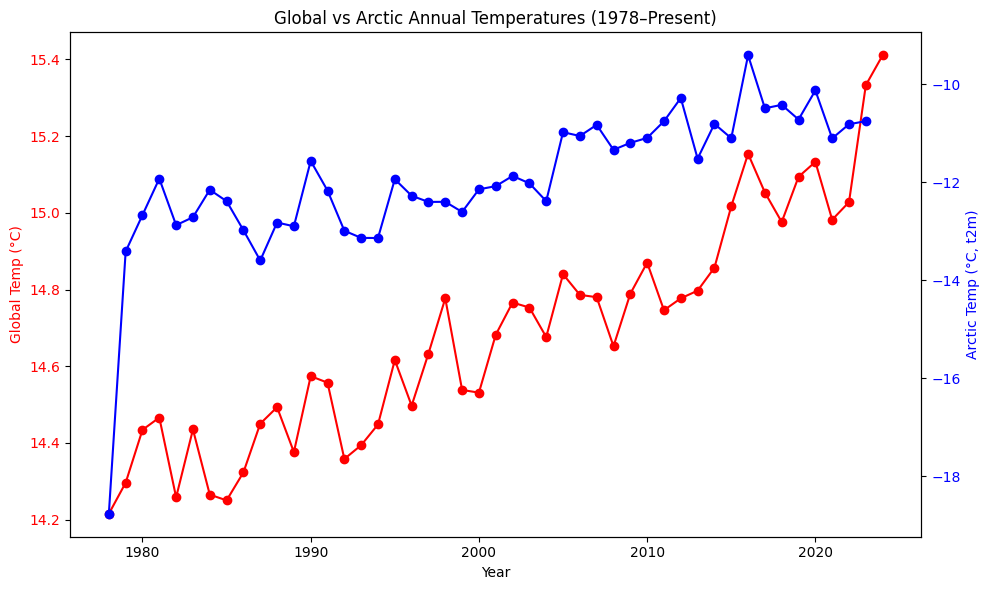

In [8]:
# --- PLOT ---
fig, ax1 = plt.subplots(figsize=(10,6))

color_g = 'red'
color_a = 'blue'

# Global temperature
ax1.plot(global_temp['year'], global_temp['global_temp_c'], color=color_g, marker='o', label='Global Temp')
ax1.set_xlabel("Year")
ax1.set_ylabel("Global Temp (°C)", color=color_g)
ax1.tick_params(axis='y', labelcolor=color_g)

# Arctic temperature
ax2 = ax1.twinx()
ax2.plot(arctic_temp['year'], arctic_temp.iloc[:, 1], color=color_a, marker='o', label='Arctic Temp')
ax2.set_ylabel("Arctic Temp (°C, t2m)", color=color_a)
ax2.tick_params(axis='y', labelcolor=color_a)

# Title
plt.title("Global vs Arctic Annual Temperatures (1978–Present)")

fig.tight_layout()
plt.show()

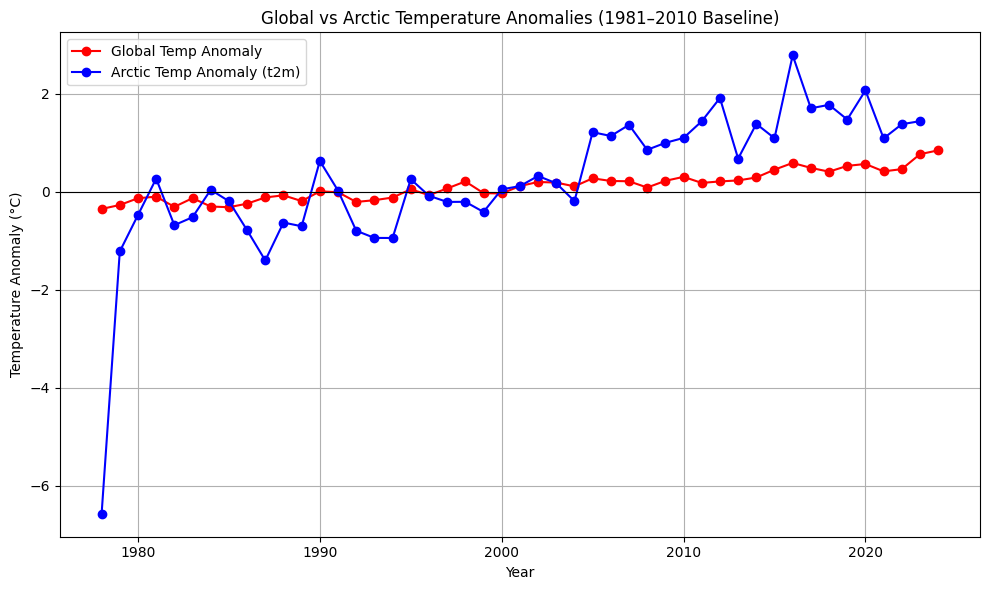

In [9]:
# --- CALCULATE ANOMALIES ---
# Define baseline period
baseline_years = (1981, 2010)

# Global anomaly
baseline_global = global_temp[(global_temp['year'] >= baseline_years[0]) &
                              (global_temp['year'] <= baseline_years[1])]['global_temp_c'].mean()
global_temp['anomaly'] = global_temp['global_temp_c'] - baseline_global

# Arctic anomaly
baseline_arctic = arctic_temp[(arctic_temp['year'] >= baseline_years[0]) &
                              (arctic_temp['year'] <= baseline_years[1])].iloc[:, 1].mean()
arctic_temp['anomaly'] = arctic_temp.iloc[:, 1] - baseline_arctic

# --- PLOT ---
plt.figure(figsize=(10,6))
plt.plot(global_temp['year'], global_temp['anomaly'], color='red', marker='o', label='Global Temp Anomaly')
plt.plot(arctic_temp['year'], arctic_temp['anomaly'], color='blue', marker='o', label='Arctic Temp Anomaly (t2m)')
plt.axhline(0, color='black', linewidth=0.8)

plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title(f"Global vs Arctic Temperature Anomalies ({baseline_years[0]}–{baseline_years[1]} Baseline)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()